In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from darkflow.net.build import TFNet

In [3]:
import matplotlib.pyplot as plt

In [4]:
%config InlineBackend.figure_format = 'svg'

In [5]:
options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov2.weights',
    'threshold': 0.3,
}

In [6]:
tfnet = TFNet(options)

C:\Users\Lolly\Desktop\Machine Learning\yolo-v2\darkflow-master\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.10628890991210938s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

In [7]:
img = cv2.imread('ai.jpg',cv2.IMREAD_COLOR)

In [8]:
img.shape

(360, 760, 3)

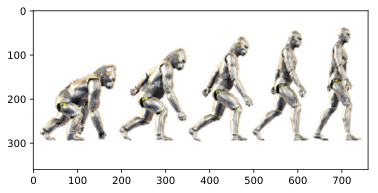

In [9]:
plt.imshow(img)

In [10]:
result = tfnet.return_predict(img)

In [11]:
result

[{'bottomright': {'x': 735, 'y': 299},
  'confidence': 0.5134232,
  'label': 'person',
  'topleft': {'x': 650, 'y': 31}},
 {'bottomright': {'x': 485, 'y': 293},
  'confidence': 0.5702141,
  'label': 'person',
  'topleft': {'x': 373, 'y': 71}}]

In [12]:
lr1 = result[0]['topleft']['x'], result[0]['topleft']['y'] 

In [13]:
br1 = result[0]['bottomright']['x'], result[0]['bottomright']['y'] 

In [14]:
img1 = cv2.rectangle(img,lr1,br1,(0,255,0),7)

In [15]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

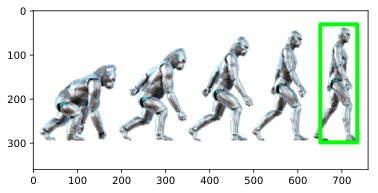

In [16]:
plt.imshow(img1)
plt.show()

In [17]:
label1 = result[0]['label']

In [33]:
img1 = cv2.putText(img1,label1,lr1,cv2.FONT_HERSHEY_COMPLEX,0.2,(0,0,0),1)

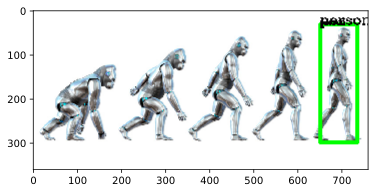

In [34]:
plt.imshow(img1)